# Introduction to `odeint` (SciPy)

`scipy.integrate.odeint` is a powerful function used to solve **ordinary differential equations (ODEs)**.

It can handle:
- Single equations (e.g., `dy/dt = ky`)
- Systems of equations (e.g., SIR, predator-prey models)


Basic Syntax

odeint(func, y0, t, args=(...))




# Introduction to `solve_ivp` (SciPy)

`scipy.integrate.solve_ivp` is a modern and flexible function for solving **initial value problems (IVPs) for ODEs** in Python.

It supports:
- Single and systems of ODEs
- Multiple integration methods (Runge-Kutta, BDF, etc.)
- Event handling
- Dense output (interpolated solution)

---

Basic Syntax

solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, args=())

# Parameters of `scipy.integrate.solve_ivp`

## Common Parameters

| Parameter    | Description |
|--------------|-------------|
| `func`        | Function defining the system of ODEs. Must be in the form `f(t, y, ...)`. |
| `t_span`     | Tuple `(t0, tf)` defining the time interval. |
| `y0`         | Initial condition array (can be scalar or vector). |
| `method`     | Integration method to use, e.g., `'RK45'`, `'RK23'`, `'Radau'`, `'BDF'`, `'LSODA'`. |
| `t_eval`     | Array of time points at which to store the computed solution. |
| `args`       | Tuple of extra arguments passed to `fun`. |

## Optional / Advanced Parameters

| Parameter      | Description |
|----------------|-------------|
| `dense_output` | If `True`, returns an interpolant function for the solution. |
| `events`       | List of event functions to track during integration. |
| `vectorized`   | If `True`, assumes `fun` handles 2D arrays for `y`. |
| `rtol`         | Relative tolerance for solver (default: 1e-3). |
| `atol`         | Absolute tolerance for solver (default: 1e-6). |
| `jac`          | Jacobian matrix or function, if needed by the method. |
| `max_step`     | Maximum allowed step size. |
| `first_step`   | Initial step size. |
| `min_step`     | Minimum allowed step size. |

---

# Parameters of `scipy.integrate.odeint`

## Common Parameters

| Parameter | Description |
|----------|-------------|
| `func`   | Function defining the derivative(s): `dy/dt = f(y, t, ...)`. Must return a list or array. |
| `y0`     | Initial conditions (scalar or array). |
| `t`      | Array of time points to solve the system over. |
| `args`   | Tuple of extra parameters passed to `func`. |

## Optional / Advanced Parameters

| Parameter    | Description |
|-------------|-------------|
| `Dfun`       | Jacobian matrix function (optional). |
| `rtol`       | Relative error tolerance. |
| `atol`       | Absolute error tolerance. |
| `full_output` | If 1, returns solver diagnostics. |
| `h0`         | Initial step size. |
| `hmin`       | Minimum step size. |
| `hmax`       | Maximum step size. |
| `mxstep`     | Maximum number of steps per time interval. |
| `printmessg` | If non-zero, prints solver messages. |

---

！！！**Tip:**  
Remember the function signature is **different**:

- `odeint`: `func(y, t, ...)`
- `solve_ivp`: `fun(t, y, ...)`

Import the environment

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

# An example

Comparing `odeint` and `solve_ivp` in SciPy

In this example, we solve the same ordinary differential equation (ODE) using two different SciPy solvers:

- `scipy.integrate.odeint` (legacy interface)
- `scipy.integrate.solve_ivp` (modern interface)

---
The ODE System

We solve the first-order linear differential equation:

$$
\frac{dy}{dt} = -2y, \quad y(0) = 1
$$

This equation has an analytical solution:

$$
y(t) = e^{-2t}
$$



Import the environment and define the system

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

# Define the ODE for odeint: f(y, t)
def f_odeint(y, t):
    return -2 * y

# Define the ODE for solve_ivp: f(t, y)
def f_solve_ivp(t, y):
    return -2 * y

Step 2: Define Initial Conditions and Time Span

In [7]:
# Initial condition
y0 = 1.0

# Time points
t = np.linspace(0, 5, 100)  # For odeint and plotting
t_span = (0, 5)             # For solve_ivp

Step 3: Solve the ODE Using Both Methods

In [9]:
# Solve using odeint
y_odeint = odeint(f_odeint, y0, t)

# Solve using solve_ivp
sol_ivp = solve_ivp(f_solve_ivp, t_span, [y0], t_eval=t)
y_solve_ivp = sol_ivp.y[0]

Step 4: Plot and Compare the Results

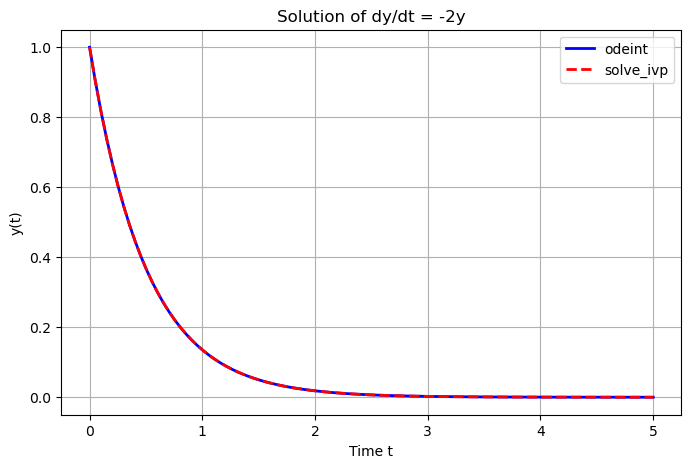

In [11]:
# Plot the solutions
plt.figure(figsize=(8, 5))
plt.plot(t, y_odeint, 'b-', label='odeint', linewidth=2)
plt.plot(t, y_solve_ivp, 'r--', label='solve_ivp', linewidth=2)
plt.xlabel('Time t')
plt.ylabel('y(t)')
plt.title('Solution of dy/dt = -2y')
plt.legend()
plt.grid(True)
plt.show()

# vector field

Define the system

In [13]:
# Defining the system with the matrix
A = np.array([[2, -2],
              [2, -3]])
#same as page 13 in PPT

# defining the vectors
def vector_field(x, y):
    dx = A[0, 0]*x + A[0, 1]*y
    dy = A[1, 0]*x + A[1, 1]*y
    return dx, dy

Generate the mesh

In [15]:
# generating mesh grids
x_vals = np.linspace(-5, 5, 20)
y_vals = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x_vals, y_vals)
U, V = vector_field(X, Y)

# vector normalization
N = np.sqrt(U**2 + V**2)
U2, V2 = U/N, V/N

Define the ODE system with initial condition

In [17]:
# defining the system with matrix-vector notation：x' = A x
def system(t, X):
    return A @ X

# Initial Conditions
x0 = [-1, 4]

# time range and evaluation nodes
t_span = [0, 10]
t_eval = np.linspace(0, 10, 300)

# solving the ODE system
sol = solve_ivp(system, t_span, x0, t_eval=t_eval)

plotting

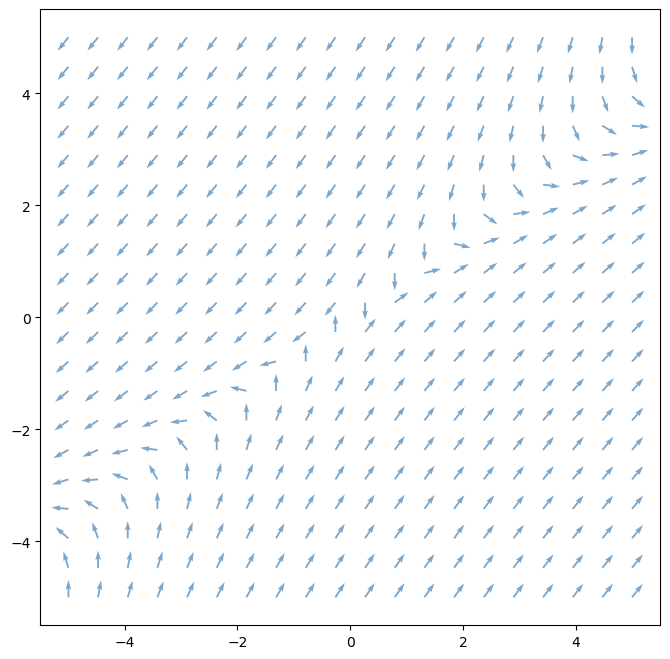

In [19]:
plt.figure(figsize=(8, 8))

# plotting the vector field
plt.quiver(X, Y, U2, V2, color='steelblue', alpha=0.7)

solving for the eigen vector(vector field)

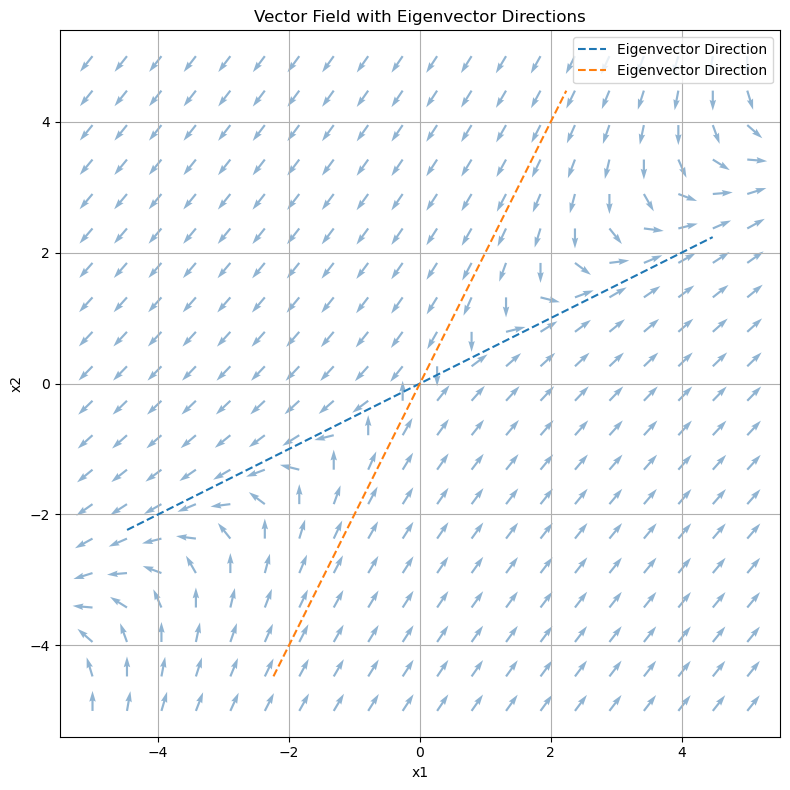

In [21]:
plt.figure(figsize=(8, 8))

# vector field with unit vector
plt.quiver(X, Y, U2, V2, color='steelblue', alpha=0.6)

# adding the eigen vector line
eigvals, eigvecs = np.linalg.eig(A)
for vec in eigvecs.T: #for loop gives us two lines
    vec = vec / np.linalg.norm(vec)  # 单位化
    # generating the line with the parameter t: (x, y) = t * vec
    t_vals = np.linspace(-5, 5, 50)
    x_line = t_vals * vec[0]
    y_line = t_vals * vec[1]
    plt.plot(x_line, y_line, '--', label='Eigenvector Direction')
    #print (eigvecs)


plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title("Vector Field with Eigenvector Directions")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.axis("equal")
plt.legend()
plt.tight_layout()
plt.show()


# Phase Portrait


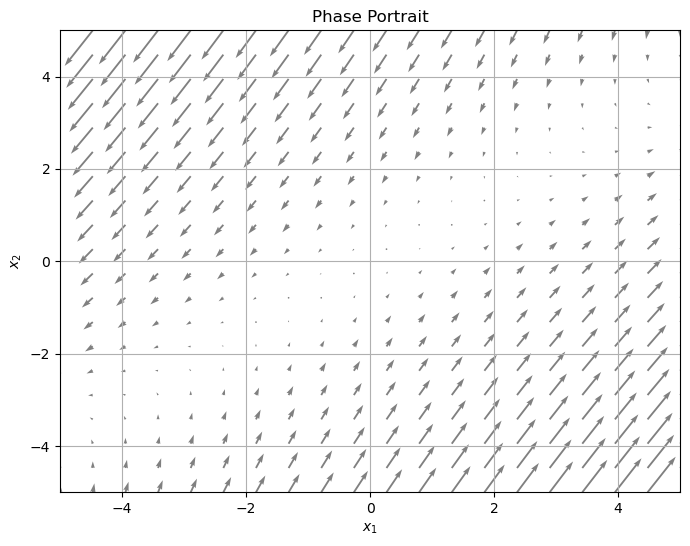

In [23]:
# defining the RHS
def system(X, t=0):
    x1, x2 = X
    dx1dt = 2*x1 - 2*x2
    dx2dt = 2*x1 - 3*x2
    return np.array([dx1dt, dx2dt])
# mesh grid
x1 = np.linspace(-5, 5, 20)
x2 = np.linspace(-5, 5, 20)
X1, X2 = np.meshgrid(x1, x2)

# derivatives for each node
U = 2*X1 - 2*X2
V = 2*X1 - 3*X2

plt.figure(figsize=(8, 6))
plt.quiver(X1, X2, U, V, color='gray')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Phase Portrait')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid(True)
plt.show()

Phase Portrait and Dynamics

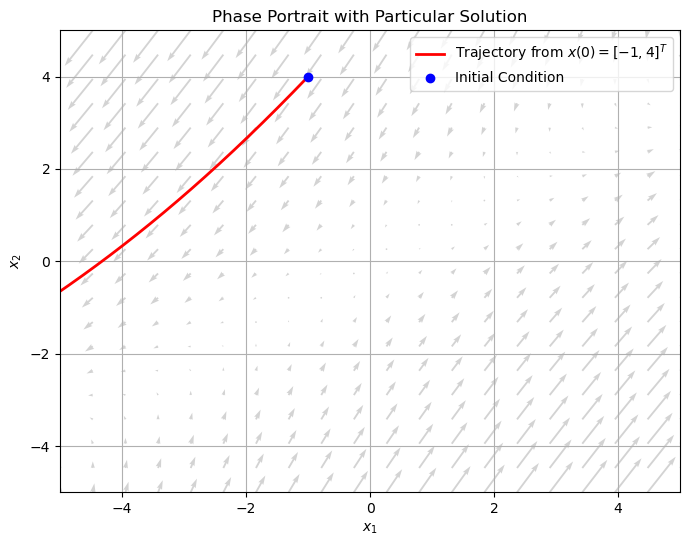

In [25]:
from scipy.integrate import odeint

# initial condition
x0 = [-1, 4]
t = np.linspace(0, 5, 200)  # 时间范围

# solving ODE
sol = odeint(system, x0, t)

# plotting the phase portrait and the solution with the initial condition
plt.figure(figsize=(8, 6))
plt.quiver(X1, X2, U, V, color='lightgray')
plt.plot(sol[:,0], sol[:,1], 'r-', linewidth=2, label='Trajectory from $x(0) = [-1, 4]^T$')
plt.plot(x0[0], x0[1], 'bo', label='Initial Condition')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Phase Portrait with Particular Solution')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.legend()
plt.grid(True)
plt.show()

# analytic solution
as a comparison

defining the analytic solution

In [27]:
# 定义 x(t) 的解析表达式
def x_analytical(t):
    t = np.asarray(t)
    x1 = -2 * np.exp(t) * 2 + 3 * np.exp(-2 * t) * 1
    x2 = -2 * np.exp(t) * 1 + 3 * np.exp(-2 * t) * 2
    return x1, x2

evaluation

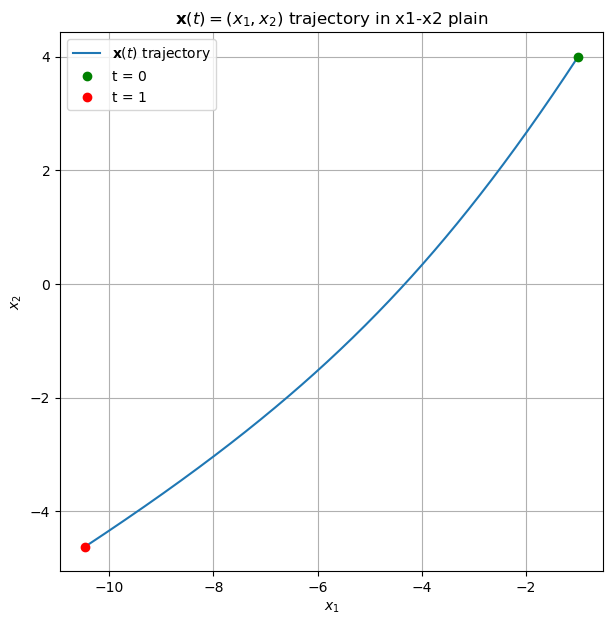

In [29]:
# t range
t_values = np.linspace(0, 1, 400)
x1, x2 = x_analytical(t_values)

plt.figure(figsize=(7,7))
plt.plot(x1, x2, label="$\\mathbf{x}(t)$ trajectory")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("$\\mathbf{x}(t)=(x_1, x_2)$ trajectory in x1-x2 plain")
plt.grid(True)
plt.legend()

# start and end points
plt.plot(x1[0], x2[0], 'go', label="t = 0")
plt.plot(x1[-1], x2[-1], 'ro', label="t = 1")
plt.legend()
plt.show()

# An exercise

In [31]:
#Block 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [33]:
#Block 2: Define the system of ODEs as a Python function
# The function should return the derivatives [dy1/dt, dy2/dt, dy3/dt]
def system(t, y):
    y1, y2, y3 = y
    dy1_dt = y2
    dy2_dt = y3
    dy3_dt = np.sin(t) + 2*y3 - y2 + 3*y1
    return [dy1_dt, dy2_dt, dy3_dt]

In [35]:
#Block 3: Set the initial conditions and time span
y0 = [1, 0, 2]        # Initial conditions: y1(0)=1, y2(0)=0, y3(0)=2
t_span = (0, 1)      # Time interval for the solution
t_eval = np.linspace(*t_span, 500)  # Time points where solution is evaluated

In [37]:
#Block 4: Solve the ODE using solve_ivp
solution = solve_ivp(system, t_span, y0, t_eval=t_eval)

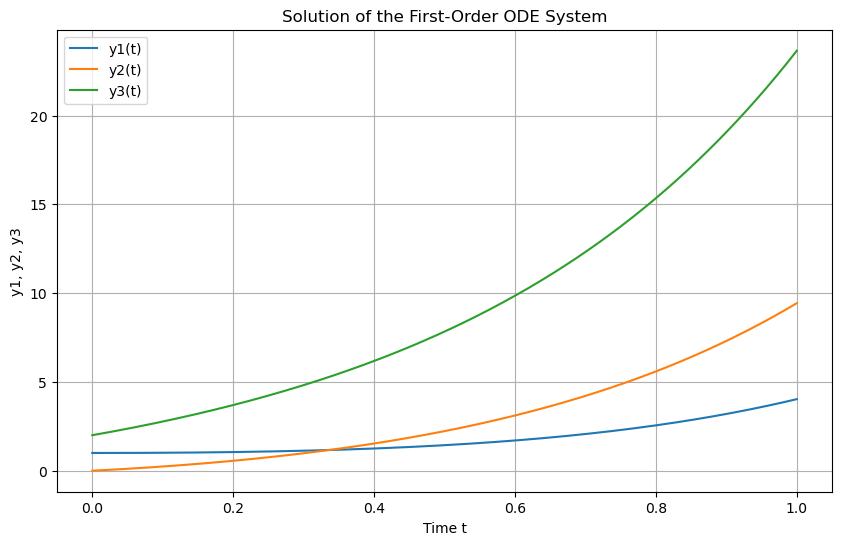

In [39]:
#Block 5: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[0], label='y1(t)')
plt.plot(solution.t, solution.y[1], label='y2(t)')
plt.plot(solution.t, solution.y[2], label='y3(t)')
plt.title('Solution of the First-Order ODE System')
plt.xlabel('Time t')
plt.ylabel('y1, y2, y3')
plt.legend()
plt.grid(True)
plt.show()

## Classic models

In [41]:
# Import required libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Enable inline plots for Colab
%matplotlib inline

# SIR model

Define the SIR model differential equations

In [43]:
def sir_model(y, t, beta, gamma):
    S, I, R = y
    N = S + I + R
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

Simulate the SIR Model

In [45]:
# Initial conditions
N = 1000            # total population
I0 = 1              # initial number of infected individuals
R0 = 0              # initial number of recovered individuals
S0 = N - I0 - R0    # initial number of susceptible individuals

# Transmission and recovery rates
beta = 0.3          # transmission rate
gamma = 0.1         # recovery rate

# Time points (in days)
t = np.linspace(0, 160, 160)

# Integrate the SIR equations over the time grid
solution = odeint(sir_model, [S0, I0, R0], t, args=(beta, gamma))
S, I, R = solution.T

plotting

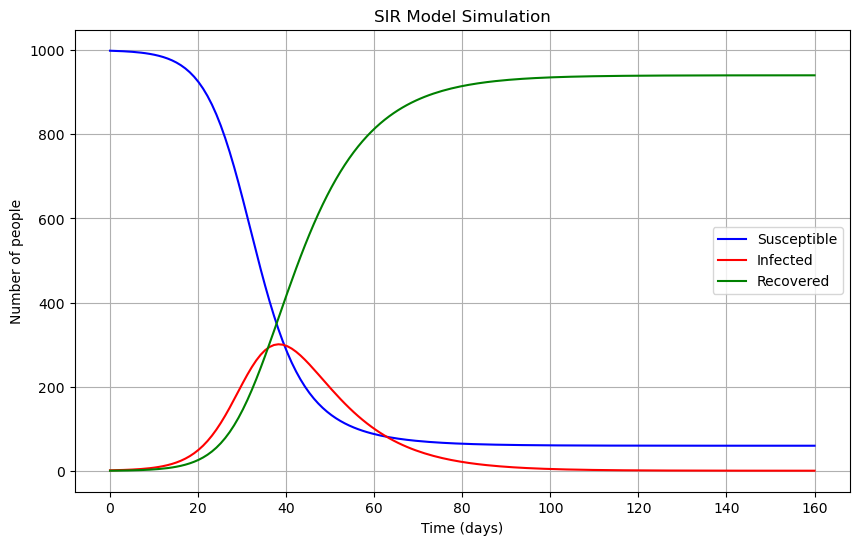

In [47]:
# Plot the data
plt.figure(figsize=(10,6))
plt.plot(t, S, label='Susceptible', color='blue')
plt.plot(t, I, label='Infected', color='red')
plt.plot(t, R, label='Recovered', color='green')
plt.xlabel('Time (days)')
plt.ylabel('Number of people')
plt.title('SIR Model Simulation')
plt.legend()
plt.grid(True)
plt.show()

# Prey-Predator model

Define the Lotka-Volterra model equations

In [49]:
def lotka_volterra(y, t, alpha, beta, delta, gamma):
    prey, predator = y
    dprey_dt = alpha * prey - beta * prey * predator
    dpredator_dt = delta * prey * predator - gamma * predator
    return [dprey_dt, dpredator_dt]

Simulate the LV Model

In [51]:
# Initial populations
prey0 = 40
predator0 = 9

# Parameters
alpha = 0.1    # Prey birth rate
beta = 0.02    # Predation rate
delta = 0.01   # Predator reproduction rate
gamma = 0.1    # Predator death rate

# Time points
t = np.linspace(0, 200, 1000)

# Solve ODE
solution_lv = odeint(lotka_volterra, [prey0, predator0], t, args=(alpha, beta, delta, gamma))
prey, predator = solution_lv.T

plotting

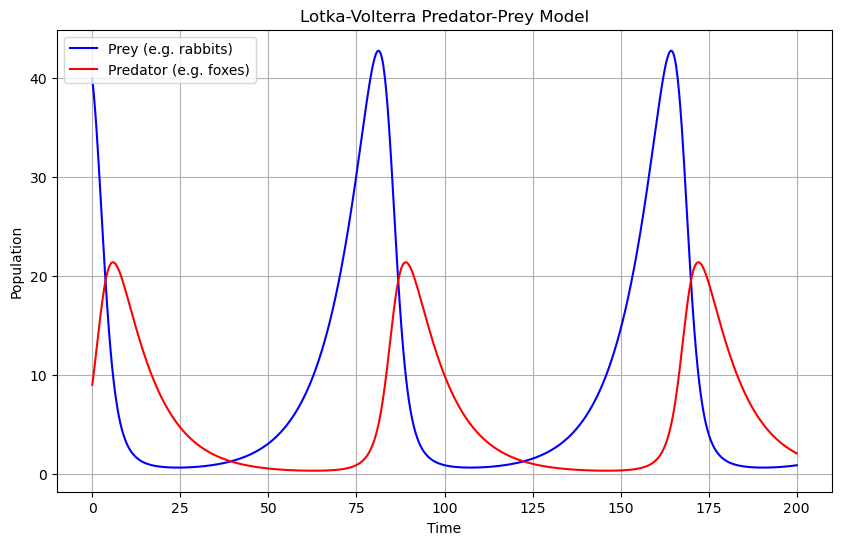

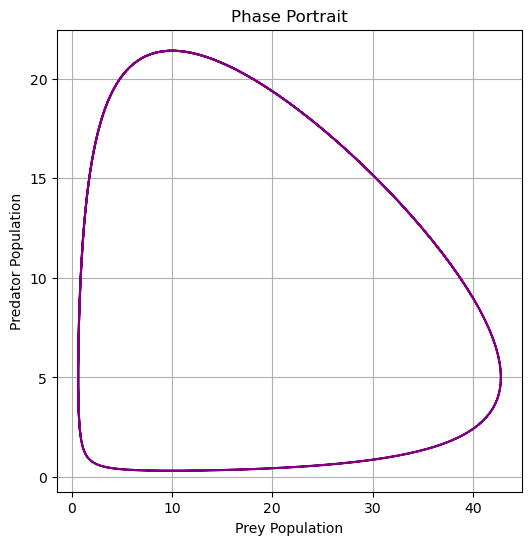

In [53]:
# Time series plot
plt.figure(figsize=(10,6))
plt.plot(t, prey, label='Prey (e.g. rabbits)', color='blue')
plt.plot(t, predator, label='Predator (e.g. foxes)', color='red')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka-Volterra Predator-Prey Model')
plt.legend()
plt.grid(True)
plt.show()

# Phase portrait
plt.figure(figsize=(6,6))
plt.plot(prey, predator, color='purple')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Phase Portrait')
plt.grid(True)
plt.show()

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
def f(x, y):#function defining for ode system
    dxdt = x * (1 - y)
    dydt = y * (x - 1)
    return dxdt, dydt

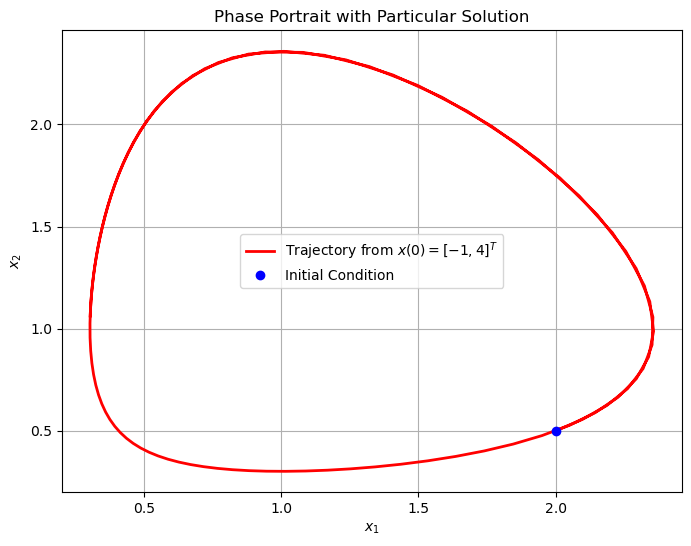

In [59]:
from scipy.integrate import odeint

# initial condition
x_int = [2, 0.5]
t = np.linspace(0, 10, 100)  # 时间范围

# defining the RHS
def system(X, t=0):
    x1, x2 = X
    dx1dt = x1 * (1 - x2)
    dx2dt = x2 * (x1 - 1)
    return np.array([dx1dt, dx2dt])

# solving ODE
sol = odeint(system, x_int, t)

#plt.plot(t, sol[:,0], label='x(t)')
#plt.plot(t, sol[:,1], label='y(t)')

# plotting the phase portrait and the solution with the initial condition
plt.figure(figsize=(8, 6))
plt.plot(sol[:,0], sol[:,1], 'r-', linewidth=2, label='Trajectory from $x(0) = [-1, 4]^T$')
plt.plot(x_int[0], x_int[1], 'bo', label='Initial Condition')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Phase Portrait with Particular Solution')
plt.legend()
plt.grid(True)
plt.show()

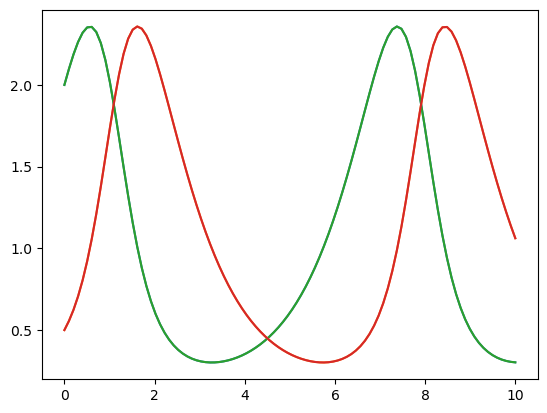

In [63]:
sol = odeint(system, x_int, t)

plt.plot(t, sol[:,0], label='x(t)')
plt.plot(t, sol[:,1], label='y(t)')
plt.show()

## numerical methods
For every subsection in this.

# Forward Euler

In [65]:
def forward_euler(x0, y0, h, N):

    x_vals = [x0]
    y_vals = [y0]
    t_vals = [0]

    x, y = x0, y0
    for i in range(N):
        dx, dy = f(x, y)
        x = x + h * dx
        y = y + h * dy

        x_vals.append(x)
        y_vals.append(y)
        t_vals.append((i + 1) * h)

    return np.array(t_vals), np.array(x_vals), np.array(y_vals)

parameters for FE

In [67]:
# initial condition
x0 = 2.0
y0 = 0.5

# time step and number of steps
h = 0.001
N = 10000  # total time T = N * h = 10

# solving
t_vals, x_vals, y_vals = forward_euler(x0, y0, h, N)

Visualization

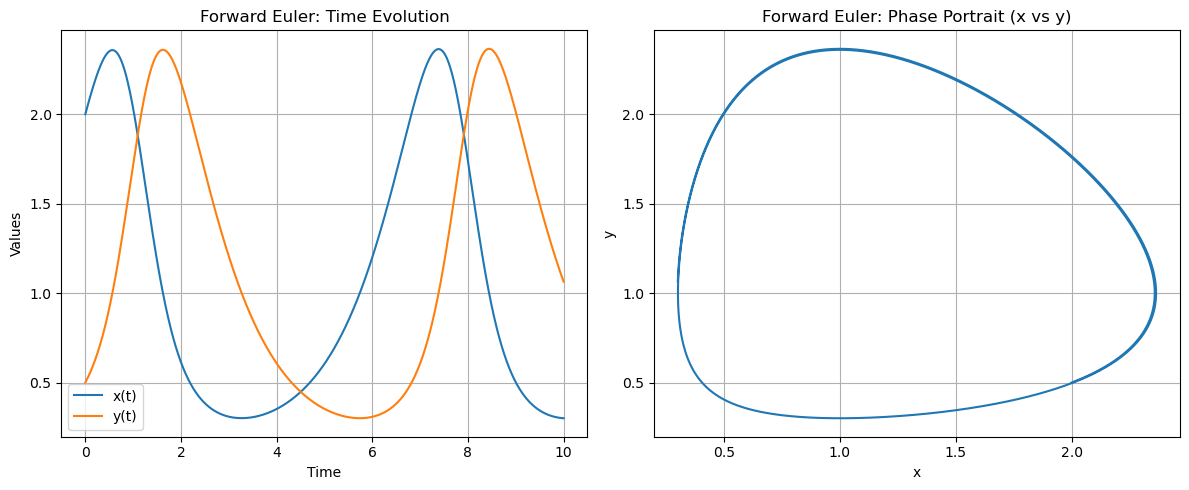

In [69]:
plt.figure(figsize=(12, 5))

# Time evolution
plt.subplot(1, 2, 1)
plt.plot(t_vals, x_vals, label='x(t)')
plt.plot(t_vals, y_vals, label='y(t)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Forward Euler: Time Evolution')
plt.legend()
plt.grid(True)

# Phase Portrait
plt.subplot(1, 2, 2)
plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Forward Euler: Phase Portrait (x vs y)')
plt.grid(True)

plt.tight_layout()
plt.show()

# R-K 4

R-K 4 algorithm

In [71]:
def rk4(x0, y0, h, N):
    """
    Runge-Kutta 4th order method for solving the nonlinear system.
    Inputs:
        x0, y0 - initial conditions
        h - step size
        N - number of steps
    Returns:
        t_vals, x_vals, y_vals - solution arrays
    """
    x_vals = [x0]
    y_vals = [y0]
    t_vals = [0]

    x, y = x0, y0
    for i in range(N):
        k1x, k1y = f(x, y)
        k2x, k2y = f(x + 0.5*h*k1x, y + 0.5*h*k1y)
        k3x, k3y = f(x + 0.5*h*k2x, y + 0.5*h*k2y)
        k4x, k4y = f(x + h*k3x, y + h*k3y)

        x += (h/6)*(k1x + 2*k2x + 2*k3x + k4x)
        y += (h/6)*(k1y + 2*k2y + 2*k3y + k4y)

        x_vals.append(x)
        y_vals.append(y)
        t_vals.append((i + 1) * h)

    return np.array(t_vals), np.array(x_vals), np.array(y_vals)

parameters

In [73]:
# Initial conditions
x0 = 2.0
y0 = 0.5
h = 0.01
N = 1000

# Solve using RK4
t_rk4, x_rk4, y_rk4 = rk4(x0, y0, h, N)

plotting

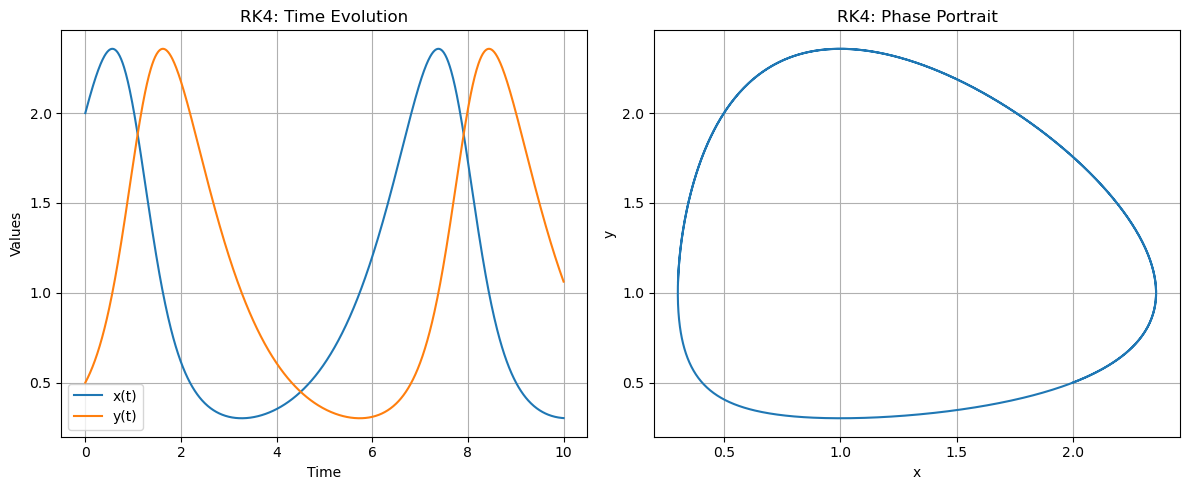

In [75]:
plt.figure(figsize=(12, 5))

# Time evolution
plt.subplot(1, 2, 1)
plt.plot(t_rk4, x_rk4, label='x(t)')
plt.plot(t_rk4, y_rk4, label='y(t)')
plt.title('RK4: Time Evolution')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)
plt.legend()

# Phase portrait
plt.subplot(1, 2, 2)
plt.plot(x_rk4, y_rk4)
plt.title('RK4: Phase Portrait')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.tight_layout()
plt.show()

# Backward Euler

Define function F and Jacobian for Newton's method

In [77]:
def F(x, y, x_prev, y_prev, h):
    """
    Nonlinear system F(x, y) = 0 for backward Euler
    """
    fx = x - x_prev - h * x * (1 - y)
    fy = y - y_prev - h * y * (x - 1)
    return np.array([fx, fy])

def J(x, y, h):
    """
    Jacobian matrix of F with respect to x and y
    """
    dfx_dx = 1 - h * (1 - y) - h * x
    dfx_dy = h * x
    dfy_dx = -h * y
    dfy_dy = 1 - h * (x - 1) - h * y
    return np.array([
        [dfx_dx, dfx_dy],
        [dfy_dx, dfy_dy]
    ])

Newton solver for each BE step

In [79]:
def newton_step(x_prev, y_prev, h, tol=1e-8, max_iter=20):
    """
    Newton's method to solve implicit BE step.
    """
    x, y = x_prev, y_prev  # initial guess

    for _ in range(max_iter):
        F_val = F(x, y, x_prev, y_prev, h)
        J_val = J(x, y, h)

        delta = np.linalg.solve(J_val, -F_val)
        x += delta[0]
        y += delta[1]

        if np.linalg.norm(delta) < tol:
            break

    return x, y

Implement Backward Euler method

In [81]:
def backward_euler(x0, y0, h, N):
    """
    Backward Euler method using Newton's method at each step.
    """
    x_vals = [x0]
    y_vals = [y0]
    t_vals = [0]

    x, y = x0, y0
    for i in range(N):
        x, y = newton_step(x, y, h)
        x_vals.append(x)
        y_vals.append(y)
        t_vals.append((i + 1) * h)

    return np.array(t_vals), np.array(x_vals), np.array(y_vals)

Run BE simulation

In [83]:
# Solve using Backward Euler
x0 = 2.0
y0 = 0.5
h = 0.001   #can change h and N, try to see the result
N = 10000
t_be, x_be, y_be = backward_euler(x0, y0, h, N)

plotting

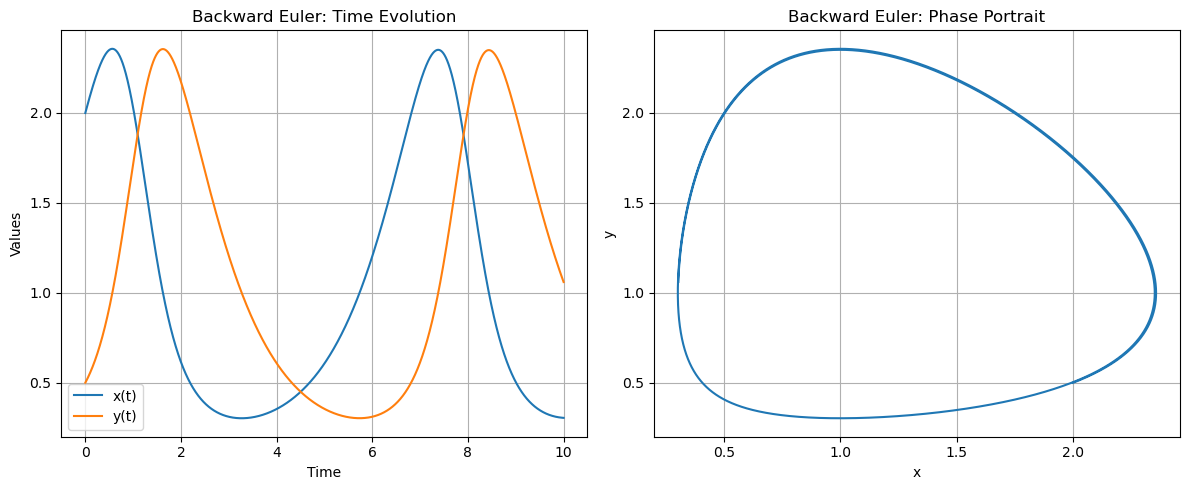

In [85]:
plt.figure(figsize=(12, 5))

# Time evolution
plt.subplot(1, 2, 1)
plt.plot(t_be, x_be, label='x(t)')
plt.plot(t_be, y_be, label='y(t)')
plt.title('Backward Euler: Time Evolution')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)
plt.legend()

# Phase portrait
plt.subplot(1, 2, 2)
plt.plot(x_be, y_be)
plt.title('Backward Euler: Phase Portrait')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.tight_layout()
plt.show()